In [496]:
# Code used for Elo Analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%store -r cg
%store -r mg


In [497]:
# Defining cg and mg to avoid dozens of 'variable is not defined' warnings
cg = cg
mg = mg


In [499]:
# Converts a number of wins, losses, and ties to a fractional score (fscore), intended for the valuecounts
def fscore(arr):
    return (arr[0] + arr[2]*0.5)/sum(arr)

# Used to shorten my code and reduce a lot of character repitition, vc short for value counts
def vc(df,cond):
    return df[cond].magnus_result.value_counts()

def vco(df): # vco short for value counts overall
    return df.magnus_result.value_counts()


In [519]:
# https://en.wikipedia.org/wiki/Elo_rating_system
# Lichess uses the glicko2 rating system which is more accurate and way more complex than Elo.
# Therefore, there will be a difference between the ratings on lichess and the ratings I calculate here
# I'll be using the linear performance rating system which is simple compared to the original Elo rating system.
# rating = avrg opponent rating + 800*fractional score - 400
def rating(avrgopprating,fscore):
    return avrgopprating + 800*fscore - 400


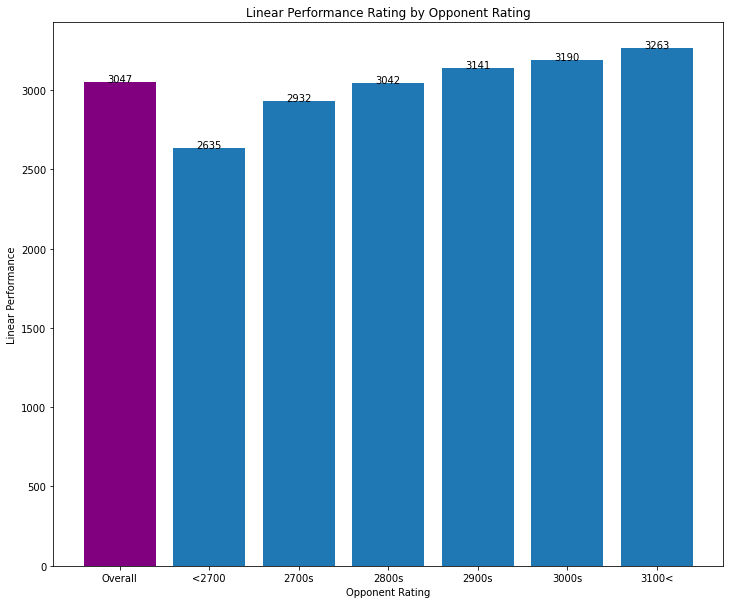

In [521]:
x = ['Overall','<2700','2700s','2800s','2900s','3000s','3100<'] 
y = [rating(np.mean(mg.opp_elo),fscore(vco(mg))),
    rating(np.mean(mg[mg.opp_elo<2700].opp_elo),fscore(vc(mg,mg.opp_elo<2700))),
    rating(np.mean(mg[(mg.opp_elo<2800) &(mg.opp_elo>=2700)].opp_elo),fscore(vc(mg,(mg.opp_elo<2800) &(mg.opp_elo>=2700)))),
    rating(np.mean(mg[(mg.opp_elo<2900) &(mg.opp_elo>=2800)].opp_elo),fscore(vc(mg,(mg.opp_elo<2900) &(mg.opp_elo>=2800)))),
    rating(np.mean(mg[(mg.opp_elo<3000) &(mg.opp_elo>=2900)].opp_elo),fscore(vc(mg,(mg.opp_elo<3000) &(mg.opp_elo>=2900)))),
    rating(np.mean(mg[(mg.opp_elo<3100) &(mg.opp_elo>=3000)].opp_elo),fscore(vc(mg,(mg.opp_elo<3100) &(mg.opp_elo>=3000)))),
    rating(np.mean(mg[mg.opp_elo>3100].opp_elo),fscore(vc(mg,mg.opp_elo>3100)))]
ratings = y
bars = plt.bar(x,y)
bars[0].set_facecolor('purple')
plt.title('Linear Performance Rating by Opponent Rating')
plt.xlabel('Opponent Rating')
plt.ylabel('Linear Performance')
for index, value in enumerate(y):
    plt.text(index, value,
             str(round(value)),ha='center')
plt.show()


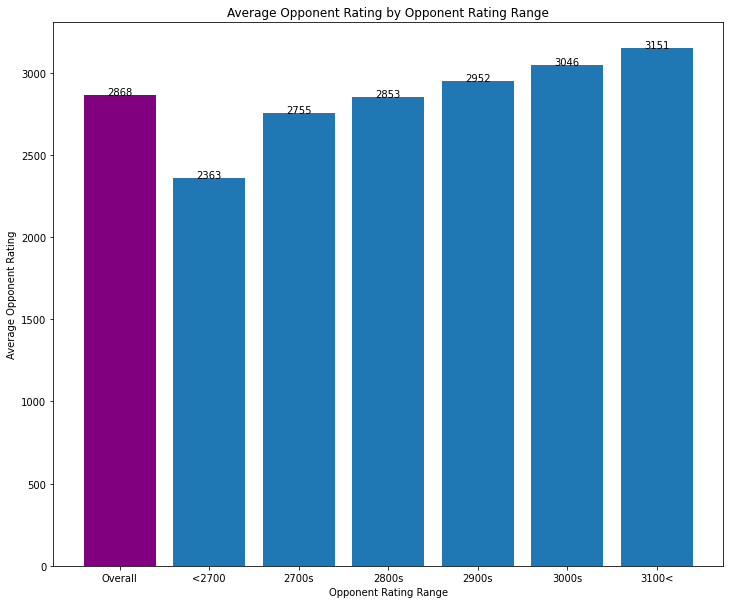

In [522]:
x = ['Overall','<2700','2700s','2800s','2900s','3000s','3100<'] 
y = [np.mean(mg.opp_elo), np.mean(mg[mg.opp_elo<2700].opp_elo),
    np.mean(mg[(mg.opp_elo<2800) &(mg.opp_elo>=2700)].opp_elo),
    np.mean(mg[(mg.opp_elo<2900) &(mg.opp_elo>=2800)].opp_elo),
    np.mean(mg[(mg.opp_elo<3000) &(mg.opp_elo>=2900)].opp_elo),
    np.mean(mg[(mg.opp_elo<3100) &(mg.opp_elo>=3000)].opp_elo),
    np.mean(mg[mg.opp_elo>3100].opp_elo)]
means = y
bars = plt.bar(x,y)
bars[0].set_facecolor('purple')
plt.title('Average Opponent Rating by Opponent Rating Range')
plt.xlabel('Opponent Rating Range')
plt.ylabel('Average Opponent Rating')
for index, value in enumerate(y):
    plt.text(index, value,
             str(round(value)),ha='center')
plt.show()


In [ ]:
# After looking at the two above graphs, I realized that this 'linear performance rating' 
# is not that useful as a metric over avrg opp rating for magnus since he wins so often.
# not that useful because magnus is literally the greatest player ever and does not lose that often
# That means the lp rating will be very correlated to avrg opponent rating
# It only stops being correlated when one plays vs higher rated players but he is among the highest rated
# This metric is a lot more useful for players that have fscores that vary a lot above and below .5 
# Magnus's fscore goes from .83 against ~2363 rated players to .64 against ~3151 rated players

In [503]:
ratingsVmeans = pd.DataFrame([ratings,means]).T
ratingsVmeans.columns = ['lp_rating','opp_rating']
ratingsVmeans

,lp_rating,opp_rating
0,3047.299568,2867.648145
1,2635.364319,2362.688263
2,2931.890751,2755.106145
3,3041.619827,2852.806730
4,3140.642283,2952.378617
5,3190.335833,3046.130897
6,3263.288451,3150.612394


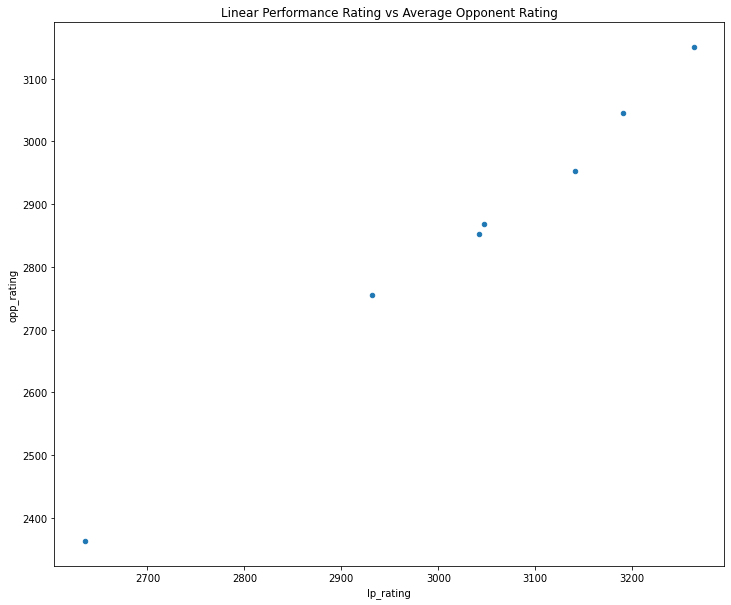

In [504]:
ratingsVmeans.plot.scatter(x='lp_rating',y='opp_rating')
plt.title('Linear Performance Rating vs Average Opponent Rating')
plt.show()

In [505]:
# LP Rating and Opponent rating are super correlated so there's no reason to use LP rating as its own metric
# .997 correlation wow
# win rate varies and opponent rating varies, should be negatively correlated, and lp rating could be used a metric to stay constant and isolate variables
# except it doesnt for magnus s
ratingsVmeans.corr(method='pearson')

,lp_rating,opp_rating
lp_rating,1.000000,0.997289
opp_rating,0.997289,1.000000


In [506]:
fscores = [fscore(vco(cg)),fscore(vc(mg,mg.opp_elo<2700)),fscore(vc(mg,(mg.opp_elo<2800) &(mg.opp_elo>=2700))),fscore(vc(mg,(mg.opp_elo<2900) &(mg.opp_elo>=2800))),fscore(vc(mg,(mg.opp_elo<3000) &(mg.opp_elo>=2900))),fscore(vc(mg,(mg.opp_elo<3100) &(mg.opp_elo>=3000))),fscore(vc(mg,mg.opp_elo>=3100))]
meansVscores = pd.DataFrame([means,fscores]).T
meansVscores.columns = ['opp_rating','fscore']
meansVscores

,opp_rating,fscore
0,2867.648145,0.724564
1,2362.688263,0.840845
2,2755.106145,0.720981
3,2852.806730,0.736016
4,2952.378617,0.735330
5,3046.130897,0.680256
6,3150.612394,0.639955


<AxesSubplot:xlabel='opp_rating', ylabel='fscore'>

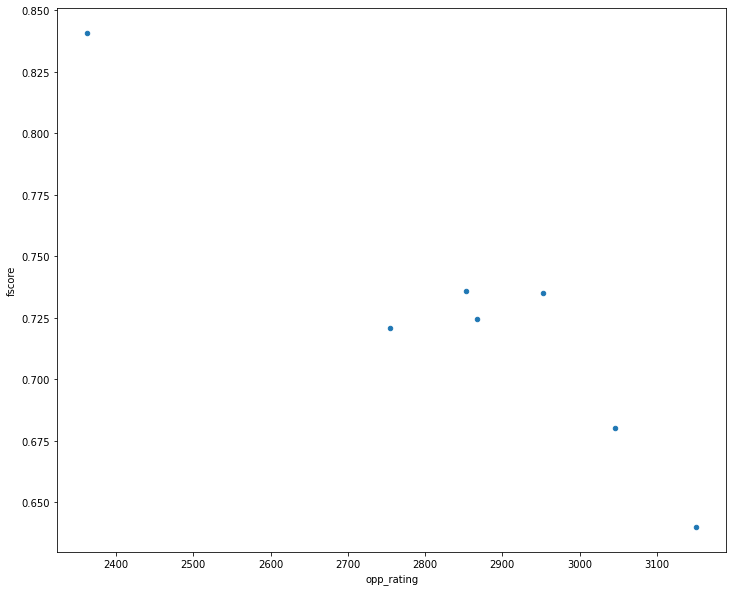

In [507]:
meansVscores.plot.scatter(x=0,y=1)

In [508]:
# 0.95 correlation, confirms that fractional score and opponent rating are very negatively correlated
meansVscores.corr(method='pearson')


,opp_rating,fscore
opp_rating,1.000000,-0.950472
fscore,-0.950472,1.000000


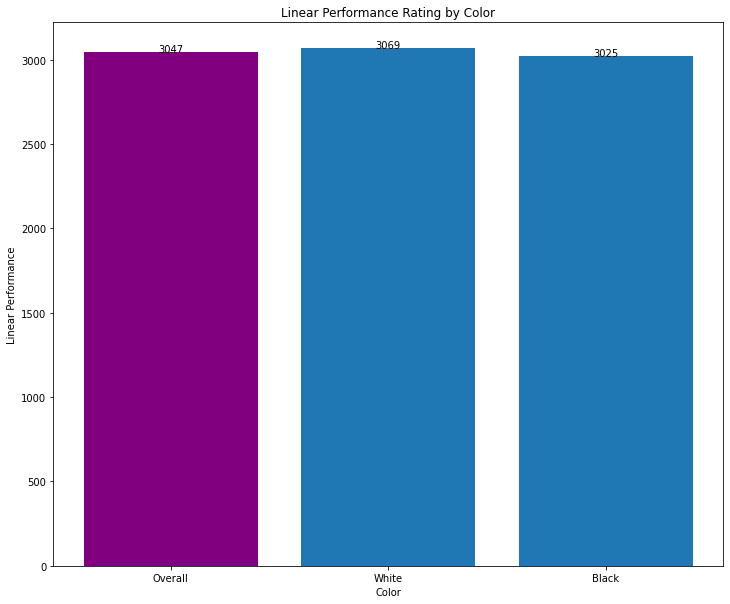

In [523]:
x = ['Overall','White','Black']
y = [rating(np.mean(mg.opp_elo),fscore(vco(mg))),
    rating(np.mean(mg[mg.magnus_color=='white'].opp_elo),fscore(vc(mg,mg.magnus_color=='white'))),
    rating(np.mean(mg[mg.magnus_color=='black'].opp_elo),fscore(vc(mg,mg.magnus_color=='black')))]
    
bars = plt.bar(x,y)
bars[0].set_facecolor('purple')
plt.title('Linear Performance Rating by Color')
plt.xlabel('Color')
plt.ylabel('Linear Performance')
for index, value in enumerate(y):
    plt.text(index, value,
             str(round(value)),ha='center')
plt.show()

In [510]:
# not influenced by opponent rating, Magnus simply plays better as white than black
print('Overall: ',np.mean(mg.opp_elo))
print(np.mean(mg[mg.magnus_color=='white'].opp_elo))
print(np.mean(mg[mg.magnus_color=='black'].opp_elo))

Overall:  2867.6481453895426
2866.768933768934
2868.5328750747162


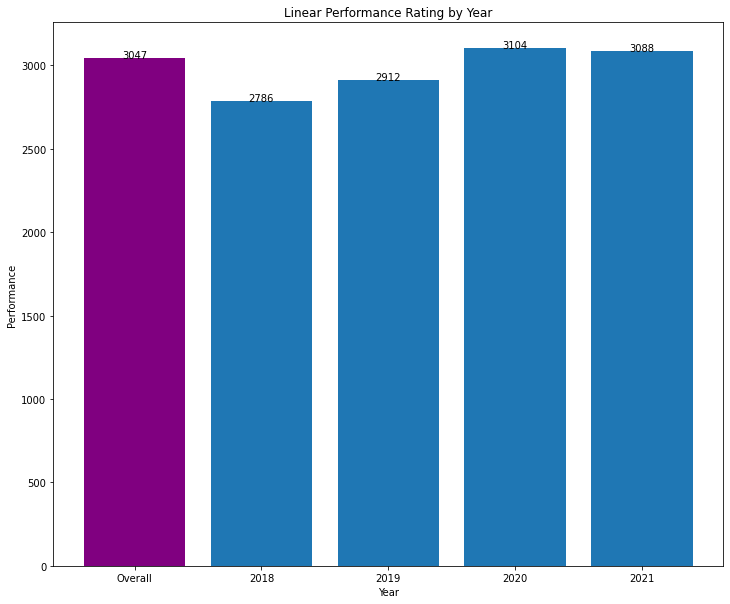

In [524]:
# avrg opponent rating had more influence than win rate here 
x = ['Overall','2018','2019','2020','2021']
y = [rating(np.mean(mg.opp_elo),fscore(vco(mg))),
    rating(np.mean(mg[mg.datetime.str[0:4]=='2018'].opp_elo),fscore(vc(mg,mg.datetime.str[0:4]=='2018'))),
    rating(np.mean(mg[mg.datetime.str[0:4]=='2019'].opp_elo),fscore(vc(mg,mg.datetime.str[0:4]=='2019'))),
    rating(np.mean(mg[mg.datetime.str[0:4]=='2020'].opp_elo),fscore(vc(mg,mg.datetime.str[0:4]=='2020'))),
    rating(np.mean(mg[mg.datetime.str[0:4]=='2021'].opp_elo),fscore(vc(mg,mg.datetime.str[0:4]=='2021')))]
bars = plt.bar(x,y)
bars[0].set_facecolor('purple')
plt.title('Linear Performance Rating by Year')
plt.xlabel('Year')
plt.ylabel('Performance')
for index, value in enumerate(y):
    plt.text(index, value,
             str(round(value)),ha='center')
plt.show()

In [512]:
print(np.mean(mg[mg.datetime.str[0:4]=='2018'].opp_elo))
print(np.mean(mg[mg.datetime.str[0:4]=='2019'].opp_elo))
print(np.mean(mg[mg.datetime.str[0:4]=='2020'].opp_elo))
print(np.mean(mg[mg.datetime.str[0:4]=='2021'].opp_elo))

2600.9757575757576
2684.9205859676176
2938.6543801652892
2905.3835410399656


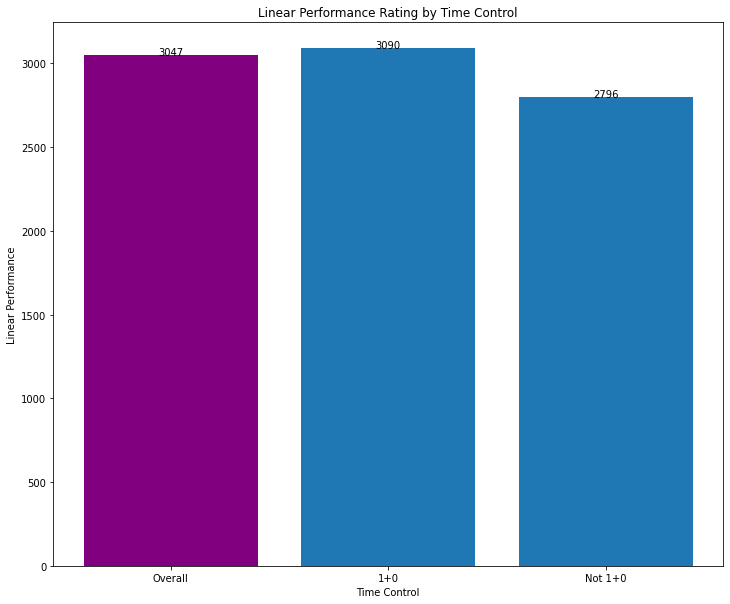

In [525]:
x = ['Overall','1+0','Not 1+0']
y = [rating(np.mean(mg.opp_elo),fscore(vco(mg))),
    rating(np.mean(mg[mg.time_control=='1+0'].opp_elo),fscore(vc(mg,mg.time_control=='1+0'))),
    rating(np.mean(mg[mg.time_control!='1+0'].opp_elo),fscore(vc(mg,mg.time_control!='1+0')))]
bars = plt.bar(x,y)
bars[0].set_facecolor('purple')
plt.title('Linear Performance Rating by Time Control')
plt.xlabel('Time Control')
plt.ylabel('Linear Performance')
for index, value in enumerate(y):
    plt.text(index, value,
             str(round(value)),ha='center')
plt.show()

In [514]:
print(np.mean(mg[mg.time_control=='1+0'].opp_elo))
print(np.mean(mg[mg.time_control!='1+0'].opp_elo))

2910.2312123592565
2619.870492635856
